# Master combined - exploratory data analysis

## Data

In [1]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Original data
master = pd.read_csv("master_combined.csv")

In [3]:
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,9.173525e+05,8.994205e+05,896844,1327933,0.861916,1.104817,12,15,27,1201948.164
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1.146516e+06,1.126214e+06,1124177,1601336,0.764482,0.946018,12,3,15,1692712.587
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,1.041503e+06,1.029726e+06,1028008,1486426,0.904479,1.121519,7,8,15,1325368.011
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,9.868068e+05,9.746908e+05,973108,1399947,0.847637,1.046196,14,9,23,1338131.288
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,1.096504e+06,1.085620e+06,1084371,1552057,0.784204,0.981137,17,12,29,1581896.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,1.114540e+06,1.103578e+06,1101665,1607448,0.733615,0.921517,19,23,42,1744349.250
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,1.162712e+06,1.153654e+06,1150737,1660909,0.752255,0.933091,20,34,54,1780006.851
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1.130508e+06,1.101670e+06,1098852,1627185,0.697260,0.881901,20,33,53,1845087.503
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,9.487515e+05,9.420765e+05,939899,1351729,0.808297,1.003723,31,34,65,1346715.325


In [4]:
#Any duplicates?
len(master) - len(master.drop_duplicates(subset="participant_id"))

0

In [5]:
#Null values?
master.isnull().sum()

participant_id                   0
age                              9
sex                              8
BMI                              9
handedness                       9
                                ..
MaskVol-to-eTIV                  0
lhSurfaceHoles                   0
rhSurfaceHoles                   0
SurfaceHoles                     0
EstimatedTotalIntraCranialVol    0
Length: 151, dtype: int64

In [11]:
master.describe().T.iloc[:50]

,count,mean,std,min,25%,50%,75%,max
age,1353.0,2.261160e+01,1.768582,18.25000,2.125000e+01,2.250000e+01,2.400000e+01,2.625000e+01
BMI,1353.0,2.345233e+01,4.461636,0.00000,2.100000e+01,2.300000e+01,2.500000e+01,4.700000e+01
NEO_N,1362.0,3.204405e+01,6.673963,12.00000,2.700000e+01,3.200000e+01,3.600000e+01,5.800000e+01
NEO_E,1362.0,4.236784e+01,5.752341,19.00000,3.800000e+01,4.300000e+01,4.700000e+01,5.800000e+01
NEO_O,1362.0,4.114097e+01,6.254869,22.00000,3.700000e+01,4.100000e+01,4.600000e+01,5.800000e+01
NEO_A,1362.0,4.148091e+01,5.790108,25.00000,3.725000e+01,4.200000e+01,4.600000e+01,5.800000e+01
NEO_C,1361.0,3.962528e+01,6.724346,19.00000,3.500000e+01,3.900000e+01,4.400000e+01,5.900000e+01
lh_bankssts_thickness,1362.0,2.612562e+00,0.150417,2.11200,2.509000e+00,2.611000e+00,2.709000e+00,3.164000e+00
lh_caudalanteriorcingulate_thickness,1362.0,2.834280e+00,0.215096,2.22600,2.685250e+00,2.823000e+00,2.968750e+00,3.663000e+00
lh_caudalmiddlefrontal_thickness,1362.0,2.668168e+00,0.148599,2.21400,2.565000e+00,2.671000e+00,2.770750e+00,3.169000e+00


<AxesSubplot:>

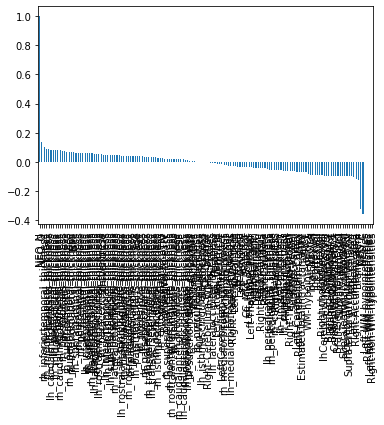

In [16]:
master.corr().loc["NEO_N"].sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

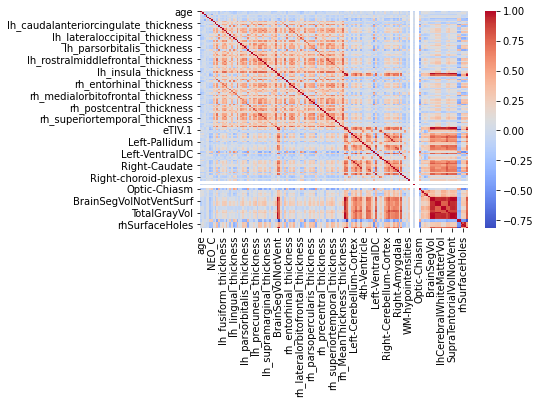

In [7]:
sns.heatmap(master.corr(),cmap="coolwarm")